In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


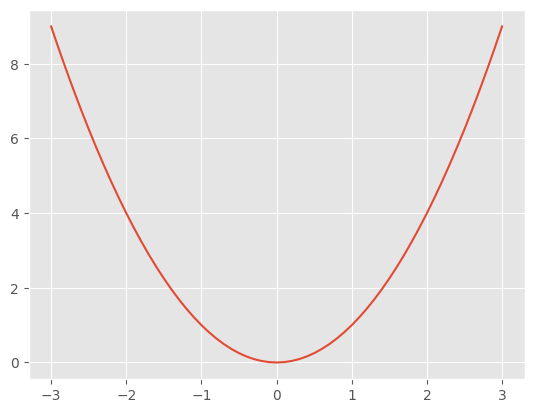

In [3]:
x=np.arange(-3,3.1,0.1)
y=x**2
plt.style.use('ggplot')
plt.plot(x,y)

In [4]:
x = np.linspace(0,15,30) # un array usando linspace
y = np.sin(x) + 0.1*np.random.randn(len(x)) # una trigonométrica con ruido usando random de numpy


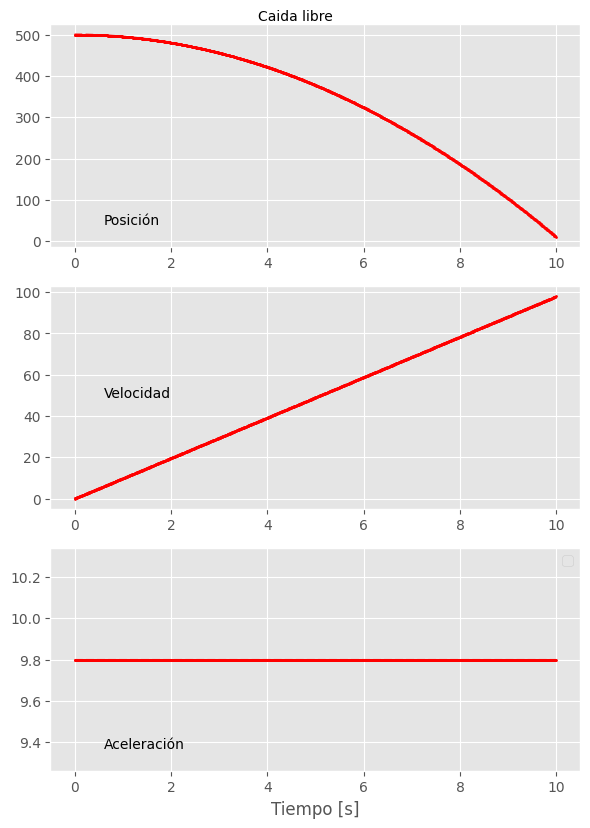

In [5]:
#Gráficos de posición velocidad y aceleración 1
#Dado un movimiento en caída libre en una dimensión con condiciones inciales arbitrarias crear en un sólo lienzo gráficas de posición,
#velocidad y aceleración en función del tiempo.

V0=int(0)
Y0=int(500)

t=np.arange(0,10,0.01)
y=Y0 + V0*t - t**2*9.8/2
V= V0 + t*9.8
a=9.8+0*t

fig, axes = plt.subplots(3, 1, figsize=(6,8))
ax = axes[0]# eje de la fila cero columna cero
ax.plot(t, y, 'o--', color='r', ms=1) #posición
ax.text(0.1, 0.1, 'Posición', transform=ax.transAxes)
ax = axes[1] # eje de la fila uno, columna uno
ax.plot(t, V, 'o--', color='r', ms=1) #velocidad
ax.text(0.1, 0.5, 'Velocidad', transform=ax.transAxes)
ax = axes[2] # eje de la fila dos, columna uno
ax.plot(t, a, 'o--', color='r', ms=1) #aceleración
ax.text(0.1, 0.1, 'Aceleración', transform=ax.transAxes)

ax.legend()
fig.tight_layout()
fig.suptitle('Caida libre', y=1, fontsize=10)
plt.xlabel('Tiempo [s]')
plt.show()

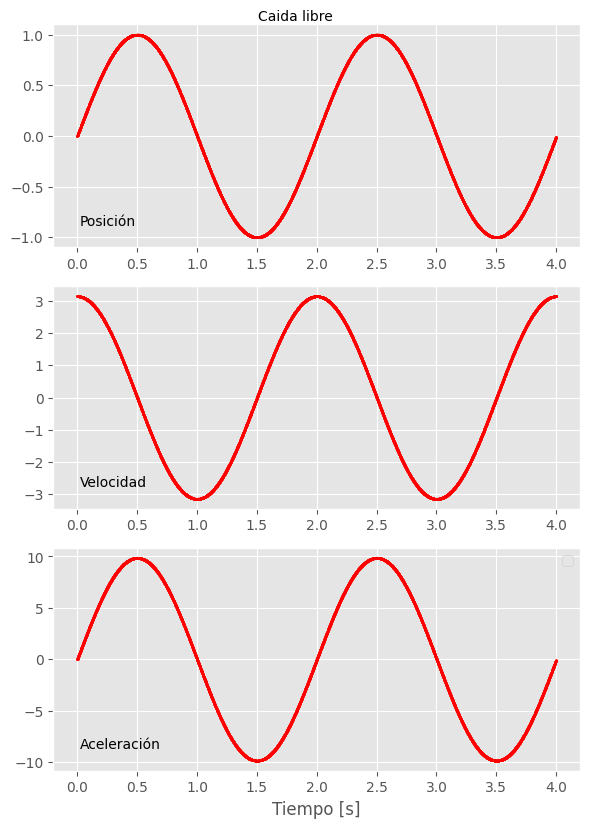

In [6]:
# Gráficos de posición velocidad y aceleración 2
# Dado un movimiento armónico simple en una dimensión (con condiciones inciales aribtrarias) crear en un sólo lienzo las gráficas de posición,
# velocidad y aceleración en función del tiempo

import numpy as np

A=1
V_ang=3.14
fase=0
t=np.arange(0,4,0.001)

x=A*np.sin(V_ang*t+fase)
v=A*V_ang*np.cos(V_ang*t+fase)
a=A*V_ang**2*np.sin(V_ang*t+fase)

fig, axes = plt.subplots(3, 1, figsize=(6,8))
ax = axes[0]# eje de la fila cero columna cero
ax.plot(t, x, 'o--', color='r', ms=1) #posición
ax.text(0.05, 0.1, 'Posición', transform=ax.transAxes)
ax = axes[1] # eje de la fila uno, columna uno
ax.plot(t, v, 'o--', color='r', ms=1) #velocidad
ax.text(0.05, 0.1, 'Velocidad', transform=ax.transAxes)
ax = axes[2] # eje de la fila dos, columna uno
ax.plot(t, a, 'o--', color='r', ms=1) #aceleración
ax.text(0.05, 0.1, 'Aceleración', transform=ax.transAxes)

ax.legend()
fig.tight_layout()
fig.suptitle('Caida libre', y=1, fontsize=10)
plt.xlabel('Tiempo [s]')
plt.show()

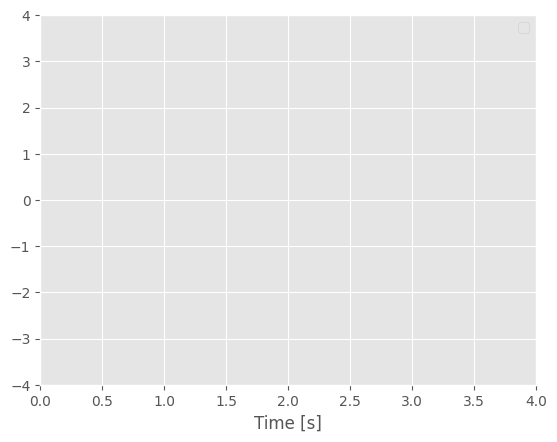

In [7]:
# Animacion 1
# Elegir alguno de los gráficos de posición anteriores y animarlo en un intervalo de tiempo adecuado para la situación elegida.

from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import rc
rc('animation', html='jshtml')

fig, ax = plt.subplots()

A=1
V_ang=3.14
fase=0
t=np.arange(0,4,0.1)
x=A*np.sin(V_ang*t+fase)
v=A*V_ang*np.cos(V_ang*t+fase)

scat = ax.scatter(t[0], x[0], c="b", s=5)
line2 = ax.plot(t[0], v[0])[0]
ax.set(xlim=[0, 4], ylim=[-4, 4], xlabel='Time [s]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x1 = t[:frame]
    y1 = x[:frame]
    # update the scatter plot:
    data = np.stack([x1, y1]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(v[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)

In [8]:
ani

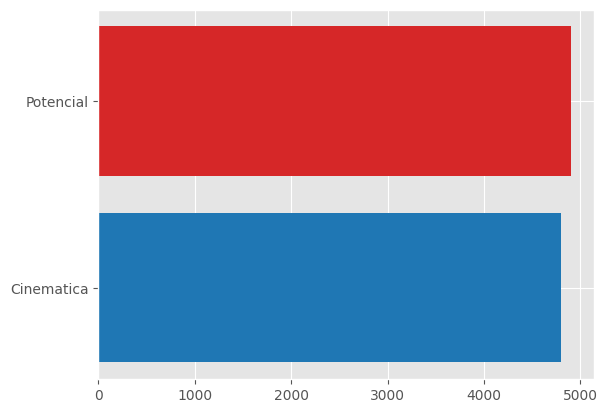

In [25]:
# Animación 2
# Hacer un gráfico de barras que muestre la relación (en una animación) entre energía cinética y energía potencial para la caída libre del punto 1

from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import rc

V0=int(0)
Y0=int(500)
masa=int(1)
data1=0
data2=0
t=0

fig, ax = plt.subplots()
data = np.array([20, 20])
x = np.array([1, 2])

artists = []
colors = ['tab:blue', 'tab:red']
for i in range(21):
  y=Y0 + V0*t - t**2*9.8/2
  V= V0 + t*9.8
  Ec=0.5*masa*V*V
  Ep=masa*9.8*y
  t=t+0.5
  x=["Cinematica", "Potencial"]
  data1=Ec
  data2=Ep
  data = [data1,data2]
  container=ax.barh(x, data, color=colors)
  artists.append(container)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

In [26]:
ani

Text(0.05, 0.1, 'Gráfico 2')

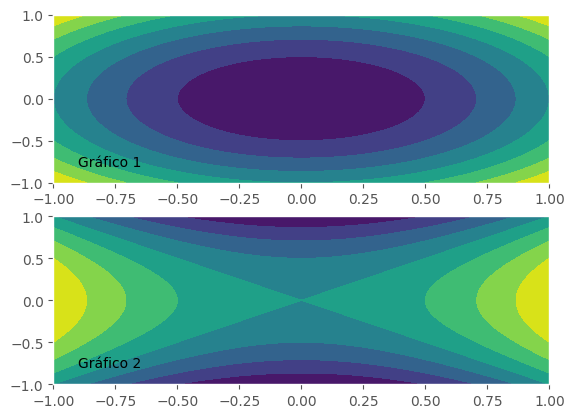

In [11]:
#Superficie de nivel
#Graficar una superficie de nivel para las funciones  f(x,y)=x2+y2  y  f(x,y)=x2−y2

_ = np.linspace(-1, 1, 200)
x, y = np.meshgrid(_,_) # la función meshgrid genera una matriz de putos para ubicar los vectores o puntos de la superficie
z = x**2 + y**2
x1, y1 = np.meshgrid(_,_)
z1= x1**2 - y1**2

fig, axes = plt.subplots(2, 1)

ax = axes[0]# eje de la fila cero columna cero
ax.contourf(x,y,z) #Primer grafico de nivel
ax.text(0.05, 0.1, 'Gráfico 1', transform=ax.transAxes)

ax = axes[1] # eje de la fila uno, columna cero
ax.contourf(x1,y1,z1) #Segundo gráfico de nivel
ax.text(0.05, 0.1, 'Gráfico 2', transform=ax.transAxes)


Text(0.5, 1.0, 'Campo Vectorial')

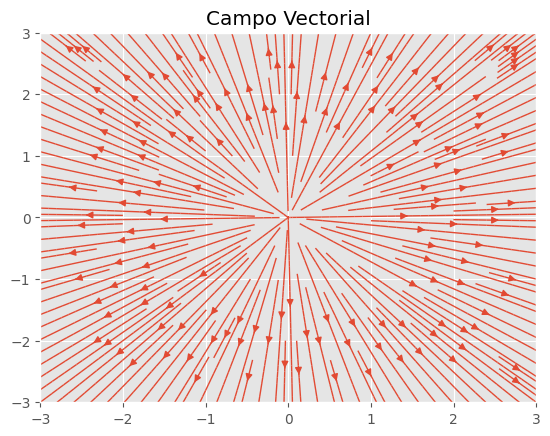

In [12]:
#Campos vectoriales
#Graficar el campo vectorial  F(x,y)=0.5xi^+0.5yj^

w = 3
_ = np.linspace(-3,3,100)
X, Y = np.meshgrid(_,_)
U = 0.5*X
V = 0.5*Y
plt.streamplot(X, Y, U, V, density=2, linewidth=1)
plt.title('Campo Vectorial')